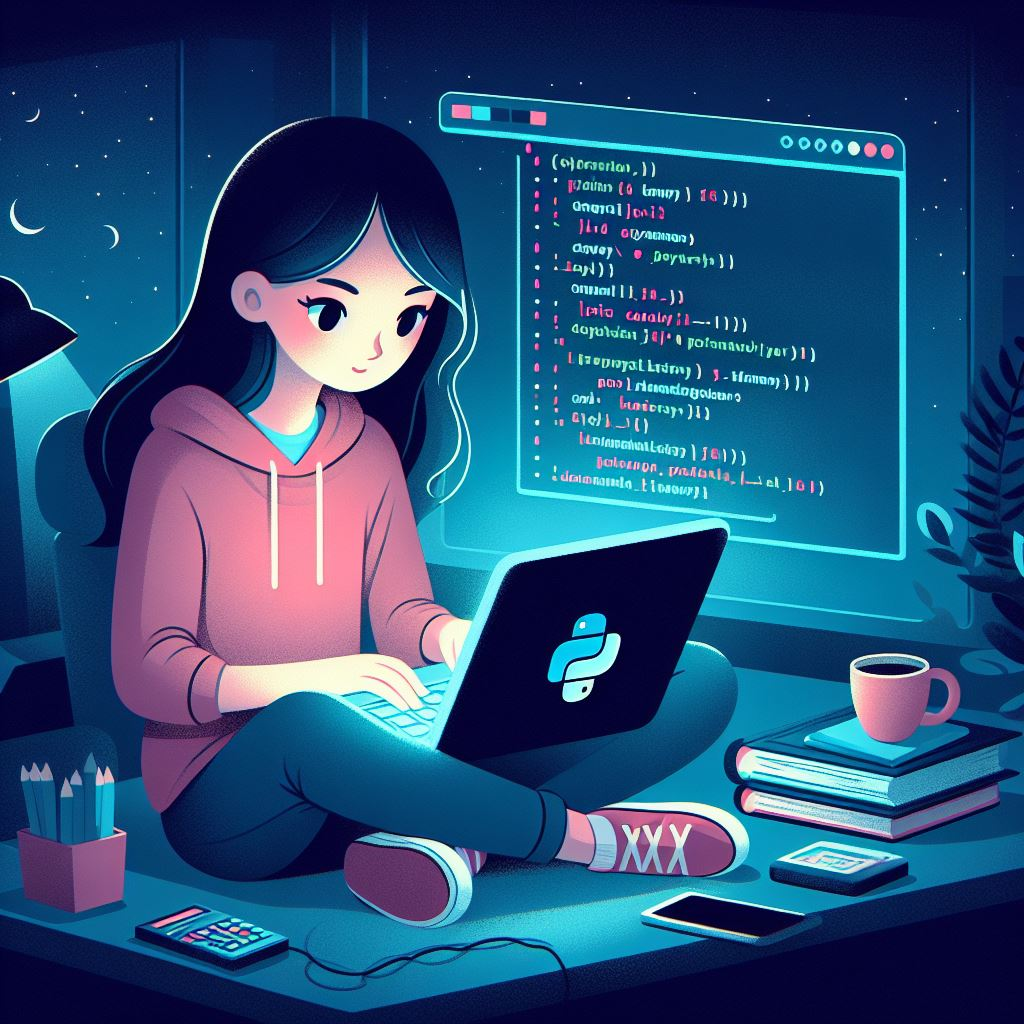

## Sorting in Python.


---


1. Sorting a list in ascending order
2. Sorting a list in descending order
3. Sorting a list of tuples
4. Sorting a list of strings
5. Sorting a list of dictionaries
6. Sorting a list of objects, based on the object's attributes

In [ ]:
# Sorting a list in ascending order

numbers = [5, 2, 9, 1, 5, 6]
sorted_numbers = sorted(numbers)
print(sorted_numbers)

[1, 2, 5, 5, 6, 9]


In [ ]:
# Sorting a List in Descending Order

numbers = [5, 2, 9, 1, 5, 6]
sorted_numbers = sorted(numbers, reverse=True)
print(sorted_numbers)

[9, 6, 5, 5, 2, 1]


In [ ]:
# Sorting a List of Tuples

tuples = [(1, 'b'), (2, 'a'), (1, 'a')]
sorted_tuples = sorted(tuples)
print(sorted_tuples)

[(1, 'a'), (1, 'b'), (2, 'a')]


In [ ]:
# Sorting a List of Strings

words = ['apple', 'banana', 'cherry', 'date']
sorted_words = sorted(words)
print(sorted_words)

['apple', 'banana', 'cherry', 'date']


In [ ]:
# Sorting a List of Dictionaries

dicts = [{'name': 'John', 'age': 15},
          {'name': 'Jane', 'age': 14},
           {'name': 'Doe', 'age': 16}]

sorted_dicts = sorted(dicts, key=lambda d: d['age'])
print(sorted_dicts)

[{'name': 'Jane', 'age': 14}, {'name': 'John', 'age': 15}, {'name': 'Doe', 'age': 16}]


### Sorting a list of objects, based on the object's attributes

In [ ]:
class Tag:
    def __init__(self, name, count):
        self.name = name
        self.count = count
    def __repr__(self):
      return f"tag(name='{self.name}', count='{self.count}')"


# Create a list of Tag objects
tags = [
    Tag(name="toe", count=10),
    Tag(name="leg", count=2),
    Tag(name="fingers", count=8),
    Tag(name="teeth", count=1),
    # Add more Tag objects here...
]

# Sort the list by count in descending order
sorted_tags = sorted(tags, key=lambda x: x.count, reverse=True)

# Now `sorted_tags` contains the sorted list
print(sorted_tags)


[tag(name='toe', count='10'), tag(name='fingers', count='8'), tag(name='leg', count='2'), tag(name='teeth', count='1')]


In [ ]:
# Sorting in place
tags.sort(key=lambda x: x.count, reverse=True)

print(tags)


[tag(name='toe', count='10'), tag(name='fingers', count='8'), tag(name='leg', count='2'), tag(name='teeth', count='1')]


In [ ]:
# Optimized Approach with operator.attrgetter():
# For better performance, especially with large lists, you can use operator.attrgetter() instead of a lambda function:
from operator import attrgetter

tags.sort(key=attrgetter("count"), reverse=True)

print(tags)


[tag(name='toe', count='10'), tag(name='fingers', count='8'), tag(name='leg', count='2'), tag(name='teeth', count='1')]


## Json Module


---



The JSON (JavaScript Object Notation) module in Python allows you to work with JSON data — whether you’re parsing, generating, or manipulating it

1. Parsing JSON to a python dict
2. Creating JSON from a python dict
3. Formatting JSON for readability
4. Reading a JSON file
5. Writing a JSON file

In [ ]:
# Parsing JSON to a Python Dictionary

import json

# A sample JSON string
person_json = '{"name": "Bob", "languages": ["English", "French"]}'

# Parse the JSON string into a dictionary
person_dict = json.loads(person_json)

print(person_dict)

{'name': 'Bob', 'languages': ['English', 'French']}


In [ ]:
# Creating JSON from a Python Dictionary

# A Python dictionary
person_dict = {'name': 'Alice', 'age': 30}

# Convert the dictionary to a JSON string
person_json = json.dumps(person_dict)

print(person_json)

{"name": "Alice", "age": 30}


In [ ]:
## Formatting JSON for Readability: The json.dumps() method allows you to
## control the formatting.
## For example, you can use the indent parameter to add indentation:

# Indent the JSON string for better readability
formatted_json = json.dumps(person_dict, indent=4)

print(formatted_json)

{
    "name": "Alice",
    "age": 30
}


In [ ]:
! echo '{"name": "Bob", "languages": ["English", "French"]}' > data.json

In [ ]:
# Working with JSON Files: You can read and write JSON data from/to files.

# Read data from a JSON file
with open('data.json', 'r') as file:
    data = json.load(file)

print(data)

{'name': 'Bob', 'languages': ['English', 'French']}


In [ ]:
# Writing JSON to a File

# Write data to a JSON file
data_to_write = {'key1': 'value1', 'key2': 'value2'}

with open('output.json', 'w') as file:
    json.dump(data_to_write, file, indent=4)

In [ ]:
! cat output.json

{
    "key1": "value1",
    "key2": "value2"
}

## Python Decorators



---



1. Basic decorator example
2. Using the `@` syntax for decorators
3. Preserving function metadata while using decorators
4. Tenacity library example on one of the best use cases of decorators

In [ ]:
# Basic Decorator Example:
# A decorator is essentially a function that takes another function as an argument and returns a modified version of it.
# make_pretty is a decorator that wraps the ordinary function.
# When we call decorated_ordinary(), it first executes the additional behavior defined in inner() (printing “I got decorated”), and then calls the original ordinary() function.
def make_pretty(func):
    def inner():
        print("I got decorated")
        func()  # Call the original function
    return inner

def ordinary():
    print("I am ordinary")

decorated_ordinary = make_pretty(ordinary)
decorated_ordinary()

I got decorated
I am ordinary


In [ ]:
# Using the @ Syntax for Decorators:
# Python provides a more concise way to apply decorators using the @ symbol.
# Here’s how you can rewrite the previous example:

@make_pretty
def ordinary():
    print("I am ordinary")

ordinary()  # Same output as before

I got decorated
I am ordinary


In [ ]:
# Preserving Function Metadata:
# When using decorators, it’s essential to preserve the original function’s metadata (such as docstrings and function name).
# To achieve this, use the functools.wraps decorator
# The @wraps(func) line ensures that the wrapper function retains the original function’s name and docstring.
from functools import wraps

def my_decorator(func):
    @wraps(func)  # Preserve original function metadata
    def wrapper(*args, **kwargs):
        print("Before function call")
        result = func(*args, **kwargs)
        print("After function call")
        return result
    return wrapper

@my_decorator
def greet(name):
    """Greet a person."""
    print(f"Hello, {name}!")

greet("Alice")
print(greet.__name__)  # Output: "greet"
print(greet.__doc__)

Before function call
Hello, Alice!
After function call
greet
Greet a person.


In [ ]:
# Tenacity -> A great example of the use of decorators
import tenacity

from tenacity import retry, stop_after_attempt, wait_fixed

@retry(stop=stop_after_attempt(3), wait=wait_fixed(2))
def test_function():
    print("Trying to connect...")
    # Let's simulate a connection attempt that fails the first two times, but succeeds the third time
    if test_function.retry.statistics['attempt_number'] < 3:
        raise Exception("Failed to connect")
    print("Connected!")

test_function()


Trying to connect...


## Python sorted containers


---


Python Sorted Containers is an Apache2 licensed sorted collections library, written in pure-Python, and as fast as C-extensions1. It is a collection of containers that allow us to insert and remove elements very efficiently while maintaining sorted order.

The main containers provided by this library are:

1. SortedList: A sorted mutable sequence in which the values are maintained in sorted order
2. SortedDict: A sorted dictionary in which the keys are maintained in sorted order
3. SortedSet: A sorted mutable set in which values are unique and maintained in sorted order

For performance comparison, refer - https://grantjenks.com/docs/sortedcontainers/performance.html

In [6]:
%pip install sortedcontainers


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:

from sortedcontainers import SortedList, SortedSet, SortedDict

# SortedList
sorted_list = SortedList()
for i in range(5, 0, -1):
    sorted_list.add(i)
print('SortedList after adding 5 elements: ', sorted_list)
sorted_list.clear()
elements = [10, 9, 8, 7, 6]
sorted_list.update(elements)
print('SortedList after updating: ', sorted_list)
sorted_list.discard(8)
print('SortedList after removing one element: ', sorted_list)
sorted_list.clear()
print('SortedList after removing all elements using clear: ', sorted_list)

SortedList after adding 5 elements:  SortedList([1, 2, 3, 4, 5])
SortedList after updating:  SortedList([6, 7, 8, 9, 10])
SortedList after removing one element:  SortedList([6, 7, 9, 10])
SortedList after removing all elements using clear:  SortedList([])


In [ ]:
# SortedDict
sorted_dict = SortedDict({'c': 3, 'a': 1, 'b': 2})
print('SortedDict: ', sorted_dict)

In [ ]:
# SortedSet
sorted_set = SortedSet('abracadabra')
print('SortedSet: ', sorted_set)

## Web Scraping


---


One of the most popular libraries for web scraping in python is beautiful soup.

Beautiful Soup is a Python library that is used for web scraping purposes to pull the data out of HTML and XML files. It creates a parse tree from page source code that can be used to extract data in a hierarchical and more readable manner







In [9]:
%pip install requests

  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached charset_normalizer-3.3.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (33 kB)
  Using cached idna-3.8-py3-none-any.whl.metadata (9.9 kB)
  Using cached urllib3-2.2.2-py3-none-any.whl.metadata (6.4 kB)
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached certifi-2024.8.30-py3-none-any.whl (167 kB)
Using cached charset_normalizer-3.3.2-cp312-cp312-macosx_11_0_arm64.whl (119 kB)
Using cached idna-3.8-py3-none-any.whl (66 kB)
Using cached urllib3-2.2.2-py3-none-any.whl (121 kB)

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
# Send an HTTP request to the URL of the webpage you want to access.
# The server responds to the request by returning the HTML content of the webpage.

import requests
URL = "http://www.example.com"
response = requests.get(URL)
response

<Response [200]>

In [7]:
%pip install BeautifulSoup4
%pip install html5lib


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
# Once you have accessed the HTML content, you need to parse it.
# Beautiful Soup provides a few simple methods and Pythonic idioms for navigating, searching, and modifying a parse tree.


from bs4 import BeautifulSoup
soup = BeautifulSoup(response.content, 'html5lib') # If you're using 'lxml' parser, replace 'html5lib' with 'lxml'

In [5]:
# Searching and navigating through the parse tree.

print(soup.prettify()) # It will print the whole HTML content in a nested structure.

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <title>
   Biwenger
  </title>
  <base href="/"/>
  <meta content="initial-scale=1,maximum-scale=1,user-scalable=no,width=device-width" name="viewport"/>
  <link href="https://cdn.biwenger.com" rel="preconnect"/>
  <link href="https://biwenger.as.com?lang=ar" hreflang="ar" rel="alternate"/>
  <link href="https://biwenger.as.com?lang=he" hreflang="he" rel="alternate"/>
  <link href="https://biwenger.as.com?lang=tr" hreflang="tr" rel="alternate"/>
  <link href="https://biwenger.as.com?lang=ru" hreflang="ru" rel="alternate"/>
  <link href="https://biwenger.as.com?lang=el" hreflang="el" rel="alternate"/>
  <link href="https://biwenger.as.com?lang=pt" hreflang="pt" rel="alternate"/>
  <link href="https://biwenger.as.com?lang=fr" hreflang="fr" rel="alternate"/>
  <link href="https://biwenger.as.com?lang=it" hreflang="it" rel="alternate"/>
  <link href="https://biwenger.as.com?lang=de" hreflang="de" rel="alternate"/>
  <link href="htt

In [4]:
## You can search for tags by using the find_all method or access them directly as attributes:

body = soup.find_all('body')
div = soup.div
div

<div>
    <h1>Example Domain</h1>
    <p>This domain is for use in illustrative examples in documents. You may use this
    domain in literature without prior coordination or asking for permission.</p>
    <p><a href="https://www.iana.org/domains/example">More information...</a></p>
</div>

In [5]:
## You can also search for tags with specific attributes:

div = soup.find_all('div', {'class' : 'my_class'})
div

[]

In [ ]:
# Extracting the data.
# Once you have located the tags of interest,
# you can use the .text or .get_text() method to extract all text within a tag:

body = soup.find_all('body')
div = soup.div
print(div.text)

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Send HTTP request to the URL
URL = 'https://en.wikipedia.org/wiki/List_of_volcanoes_in_Indonesia'
response = requests.get(URL)

# Step 2: Parse HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Step 3: Locate and extract table data
table = soup.find('table', {'class': 'wikitable sortable'})

# Step 4: Extract headers from table
headers = [header.text.strip() for header in table.find_all('th')]

# Step 5: Extract text from table cells
data = []
for row in table.find_all('tr')[1:]:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append(cols)

# Step 6: Convert the data into a pandas DataFrame
df = pd.DataFrame(data, columns=headers)

df.head()